In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# load and preprocess
def load_and_preprocess(data_path):
    data = pd.read_csv(data_path)
    data = data.values  # or data = data.to_numpy()
    np.random.shuffle(data)
    x = data[:,1:].reshape(-1,28,28,1)/255.0
    y = data[:,0].astype(np.int32)
    y = to_categorical(y, num_classes=len(set(y)))

    return x,y

train_data_path = "./mnist-csv/mnist_train.csv"
test_data_path = "./mnist-csv/mnist_test.csv"

x_train, y_train = load_and_preprocess(train_data_path)
x_test, y_test = load_and_preprocess(test_data_path)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


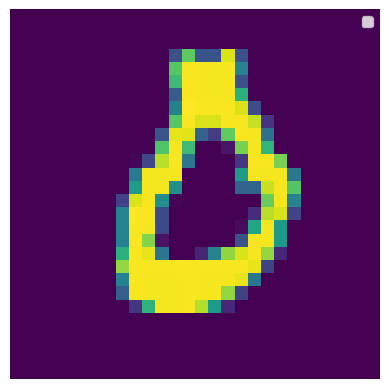

0


In [5]:

# %% visualize
index = 3
vis = x_train.reshape(60000,28,28)
plt.imshow(vis[index,:,:]) 
plt.legend()
plt.axis("off")
plt.show()
print(np.argmax(y_train[index]))



In [7]:

#%% CNN
numberOfClass = y_train.shape[1]

model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 16, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 128, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units = 256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units = numberOfClass))
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])




# Train
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs= 25, batch_size= 4000)
#%%
model.save_weights('cnn_mnist_model.h5')  # always save your weights after training or during training

Epoch 1/25
15/15 [==============================] - 10s 639ms/step - loss: 1.0213 - accuracy: 0.6927 - val_loss: 2.0705 - val_accuracy: 0.6722
Epoch 2/25
15/15 [==============================] - 10s 642ms/step - loss: 0.2569 - accuracy: 0.9254 - val_loss: 2.1153 - val_accuracy: 0.1137
Epoch 3/25
15/15 [==============================] - 9s 634ms/step - loss: 0.1479 - accuracy: 0.9556 - val_loss: 2.2865 - val_accuracy: 0.1135
Epoch 4/25
15/15 [==============================] - 9s 618ms/step - loss: 0.1063 - accuracy: 0.9687 - val_loss: 2.4714 - val_accuracy: 0.1135
Epoch 5/25
15/15 [==============================] - 9s 596ms/step - loss: 0.0857 - accuracy: 0.9741 - val_loss: 2.6780 - val_accuracy: 0.1135
Epoch 6/25
15/15 [==============================] - 9s 597ms/step - loss: 0.0697 - accuracy: 0.9796 - val_loss: 2.8807 - val_accuracy: 0.1135
Epoch 7/25
15/15 [==============================] - 9s 599ms/step - loss: 0.0593 - accuracy: 0.9823 - val_loss: 3.1124 - val_accuracy: 0.1135
Epoc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


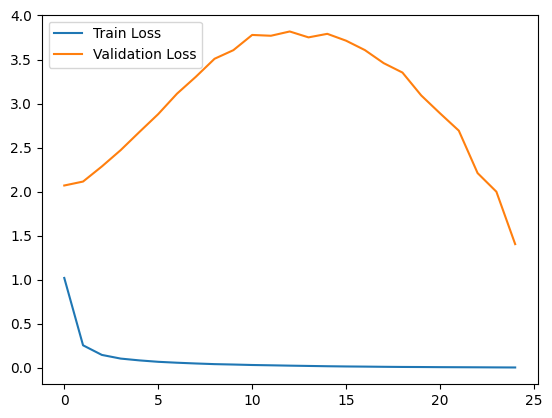

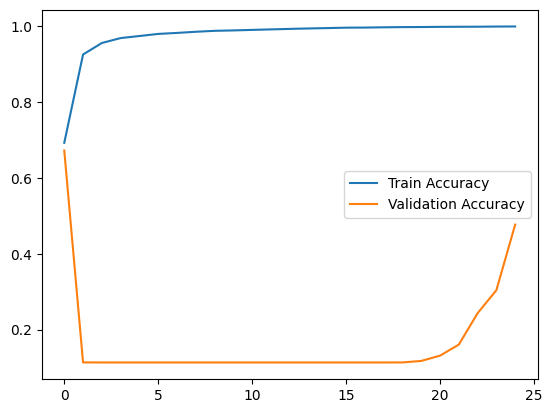

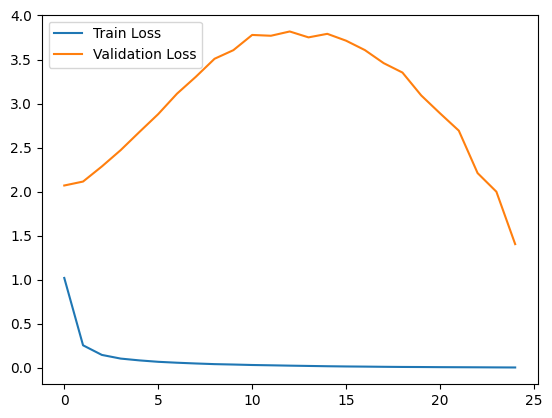

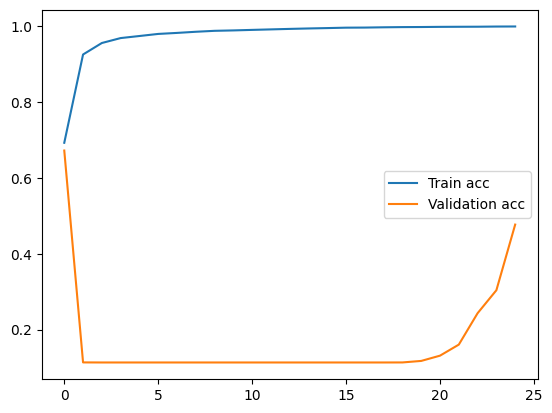

In [10]:


#%% evaluation 
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy")
plt.legend()
plt.show()

#%% save history
import json
with open('cnn_mnist_hist.json', 'w') as f:
    json.dump(hist.history, f)
    
#%% load history
import codecs
with codecs.open("cnn_mnist_hist.json", 'r', encoding='utf-8') as f:
    h = json.loads(f.read())


plt.plot(h["loss"], label = "Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label = "Train acc")
plt.plot(h["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show() 